# Assignment 1 Computational NeuroScience

## Simulation of the ODE system of Izhikievich model for the neuron dynamics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
0.04 *(-64)**2 + 5*(-64) + 140 

-16.159999999999997

Definition of the Izhikevich model dynamical system:

$
\dot{u}= 0.04 u^2 + 5u+ 140 -w +I(t)
$

$
\dot{w} =a(bu-w)
$

if $u\geq 30$ then
    $u\leftarrow c$, $w \leftarrow w+d$,
    
 where $a,b,c,d,\in \R$, $I:\R\to \R$  are some (hyper)parameters to be chosen.


In [4]:
def iziechevich_euler( a, b, c, d, I, delta_t, u=-65, w=None):
    """
    Simulate the Izhikevich model using Euler's method.
    """
    if w is None:
        w = b*u  # nullcline condition
    u_dynamics=[u] 
    w_dynamics=[w]
    
    for t in range(len(I)):
        u_new = u + delta_t*(0.04*u**2 + 5*u + 140 -w + I[t])
        w_new = w+ delta_t*(a*(b*u -w))   
        
        if u_new>=30:
           u_new=c
           w_new =w+d
           u_dynamics.append(30)
        else:
            u_dynamics.append(u)
        w_dynamics.append(w)
        u=u_new
        w = w_new
    return u_dynamics, w_dynamics

In [5]:
def iziechevich_leapfrog( a, b, c, d, I, delta_t, u=-65, w=None, p_0 = 140, p_1 = 5, p_2 = 0.04):
    """
    Simulate the Izhikevich model using Euler's method.
    """
    if w is None:
        w = b*u  # nullcline condition
    u_dynamics=[u] 
    w_dynamics=[w]
    
    for t in range(len(I)):
        u = u + delta_t*(p_2*u**2 + p_1*u + p_0 -w + I[t])
        w_new = w+ delta_t*(a*(b*u -w))   
        
        if u>=30:
           u=c
           w_new =w+d
           u_dynamics.append(30)
        else:
            u_dynamics.append(u)
        w_dynamics.append(w)
        w = w_new
    return u_dynamics, w_dynamics

## Params dictionary 

In [33]:

# create input currents vector for each neuro type

# Parameters for (A) tonic spiking -> I = 14 if t > T1 else 0
I1 = np.zeros(1000)
I1[220:] = 14

# Parameters for (B) phasic spiking -> I = 15 if t > T1 else 0
I2 = np.zeros(1000)
I2[220:] = 0.5

# Parameters for (C) tonic bursting -> I = 15 if t > T1 else 0
I3 = np.zeros(1000)
I3[220:] = 15

# Parameters for (D) phasic bursting -> I = 0.6 if t > T1 else 0
I4 = np.zeros(1000)
I4[200:] = 0.6

# Parameters for (E) mixed mode -> I = 10 if t > T1 else 0
I5 = np.zeros(1000)
I5[220:] = 10

# Parameters for (F) spike frequency adaptation -> I = 30 if t > T1 else 0
I6 = np.zeros(1000)
I6[85:] = 30

# Parameters for (G) Class 1 excitable
I7 = np.zeros(1000)
I7[100:] = 0.055 * (np.arange(0, 900))

# Parameters for (H) Class 2 excitable
I8 = np.zeros(1000) -0.5
I8[300:] = -0.5 + (0.015 * (np.arange(700)))

# Parameters for (I) spike latency -> I = 7.04 if t > T1 and t < T1+3 else 0
I9 = np.zeros(1000)
I9[220:250] = 7.04

# Parameters for (J) subthreshold oscillations -> I = 2 if t > T1 and t < T1+5 else 0
I10 = np.zeros(1000)
I10[220:225] = 2

# Parameters for (K) resonator -> I = 0.65 if ((t>T1) and (t < T1+4)) or ((t>T2) and (t < T2+4)) or ((t>T3) and (t < T3+4)) or ((t>T4) and (t < T4+4))  else 0
I11 = np.zeros(1000)

I11[220:230] = 0.65
I11[240:250] = 0.65
I11[720:730] = 0.65
I11[760:770] = 0.65

# Parameters for (L) integrator -> I = 9 if ((t>T1) and (t < T1+2)) or ((t>T2) and (t < T2+2)) or ((t>T3) and (t < T3+2)) or ((t>T4) and (t < T4+2))  else 0
I12 = np.zeros(1000)
I12[220:230] = 20
I12[240:250] = 20
I12[780:790] = 20
I12[830:840] = 20


# Parameters for (M) rebound spike -> I = -15 if (t>T1) and (t < T1+5)  else 0
I13 = np.zeros(1000)
I13[220:270] = -15

# Parameters for (N) rebound burst -> I = -15 if (t>T1) and (t < T1+5)  else 0
I13 = np.zeros(1000)
I13[220:225] = -15

# Parameters for (O) threshold variability -> I = 1 if ((t>10) and (t < 15)) or ((t>80) and (t < 85)) else -6 if (t>70) and (t < 75) else 0
I14 = np.zeros(1000)
I14[40:45] = 1
I14[320:325] = 1
I14[280:285] = -6

# Parameters for (P) bistability -> I = 1.24 if ((t>T1) and (t < T1+5)) or ((t>T2) and (t < T2+5)) else 0.24
I15 = np.zeros(1000) + 0.24
I15[220:225] = 1.24
I15[770:775] = 1.24


# Parameters for (Q) Depolarising After-Potential -> I = 20 if np.abs(t-T1)<1  else 0
I16 = np.zeros(1000)
I16[90:110] = 10

# Parameters for (R) accomodation -> I = t / 25 if (t < 200) else 0 if t < 300 else (t-300) / 12.5 * 4 if  t < 312.5 else 0
I17 = np.zeros(1000)
I17[:200] = np.arange(200) / 25
I17[300:500] = 0
I17[500:520] = (np.arange(520-500)) / 12.5 * 4

# Parameters for (S) inhibition induced spiking -> I = 80 if (t < 50) or (t>250)  else 75
I18 = np.zeros(1000)+80
I18[200:800]=75

# Parameters for (T) inhibition induced bursting -> I = 80 if (t < 50) or (t>250)  else 75
I19 = 75*np.ones(1000)+80
I19[100:150] = 75


param_dict = {
    "tonic_spiking": {"I": I1, "a": 0.02, "b": 0.2, "c": -65, "d": 6},
    "phasic_spiking": {"I": I2, "a": 0.02, "b": 0.25, "c": -65, "d": 6},
    "tonic_bursting": {"I": I3, "a": 0.02, "b": 0.25, "c": -50, "d": 2},
    "phasic_bursting": {"I": I4, "a": 0.02, "b": 0.25, "c": -55, "d": 0},
    "mixed_mode": {"I": I5, "a": 0.02, "b": 0.2, "c": -55, "d": 4},
    "spike_frequency_adaptation": {"I": I6, "a": 0.01, "b": 0.2, "c": -65, "d": 8},
    "class_1_excitable": {"I": I7, "a": 0.02, "b": -0.1, "c": -55, "d": 6},
    "class_2_excitable": {"I": I8, "a": 0.2, "b": 0.26, "c": -65, "d": 0},
    "spike_latency": {"I": I9, "a": 0.02, "b": 0.2, "c": -65, "d": 6},
    "subthreshold_oscillations": {"I": I10, "a": 0.05, "b": 0.26, "c": -60, "d": 0},
    "resonator": {"I": I11, "a": 0.1, "b": 0.26, "c": -60, "d": -1},
    "integrator": {"I": I12, "a": 0.02, "b": -0.1, "c": -55, "d": 6},
    "rebound_spike": {"I": I13, "a": 0.03, "b": 0.25, "c": -60, "d": 4},
    "rebound_burst": {"I": I13, "a": 0.03, "b": 0.25, "c": -52, "d": 0},
    "threshold_variability": {"I": I14, "a": 0.03, "b": 0.25, "c": -60, "d": 4},
    "bistability": {"I": I15, "a": 0.1, "b": 0.26, "c": -60, "d": 0},
    "depolarising_after_potential": {"I": I16, "a": 1, "b": 0.2, "c": -60, "d": -21},
    "accomodation": {"I": I17, "a": 0.02, "b": 1, "c": -55, "d": 4},
    "inhibition_induced_spiking": {"I": I18, "a": -0.02, "b": -1, "c": -60, "d": 8},
    "inhibition_induced_bursting": {"I": I19, "a": -0.026, "b": -1, "c": -45, "d": -2}
}

In [7]:
def key_to_title(key):
    """
    Convert the key to a title.
    """
    return key.replace("_", " ").title()


def simulate_and_plot(u_0, key, solver='leapfrog', delta_t=0.25, p_0 = 140, p_1 = 5, p_2 = 0.04, w=None):
    """
    Simulate the Izhikevich model using Euler's method.
    """
    if w is None:
        w=u_0 * param_dict[key]['b']
    if solver == 'leapfrog':
        u, w = iziechevich_leapfrog(
            **param_dict[key],
            u=u_0,
            delta_t=delta_t,
            p_0 = p_0,
            p_1 = p_1,
            p_2 = p_2,
            w=w
        )
    if solver == 'euler':
        u, w = iziechevich_euler(
            **param_dict[key],
            u=u_0,
            delta_t=delta_t
        )
    # plot of u and w dynamics
    fig, ax, = plt.subplots(1,2, figsize=(15, 5))
    ax[0].plot(u, label="u")
    ax[0].plot(w, label="w")
    ax[0].set_title(f'Dynamic ({key_to_title(key)})')
    # plot of the phase portrait: u is on the x-axis and w is on the y-axis
    ax[1].plot(u, w)
    ax[1].set_title(f'Phase Portrait ({key_to_title(key)})')

    # starting point 
    ax[1].scatter(u_0, param_dict[key]["b"]*u_0, c='r', label='Starting Point')

    # end points
    # ax[1].scatter(u[-500:-1], w[-500:-1], c='g', label='last 500 points')

    #end point
    ax[1].scatter(u[-1], w[-1], c='g', label='End Point')

    # w nullcline
    #x = np.linspace(-100, 100, 1000)
    #w_n = param_dict[key]["b"]*x
    # ax[1].plot(u, w_n, 'k--', label='w nullcline')
    
    ax[1].legend()

    return u, w , ax


## Simulations

### (A) Tonic Spiking

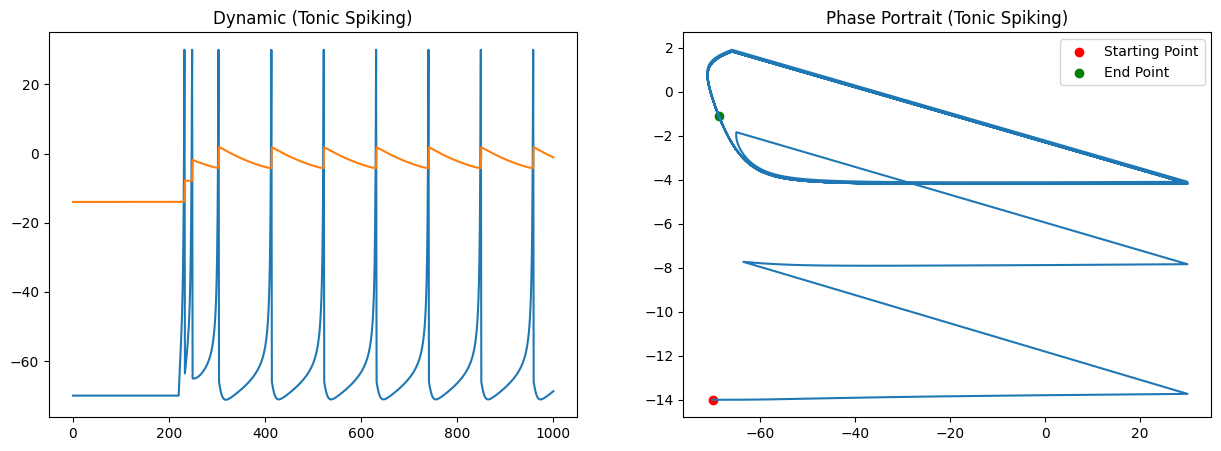

In [135]:
u=-70
u, w = simulate_and_plot(u, "tonic_spiking")

Here, we can see from the phase potrait that we have a limit cycle. 

### (B) Phasic Spiking

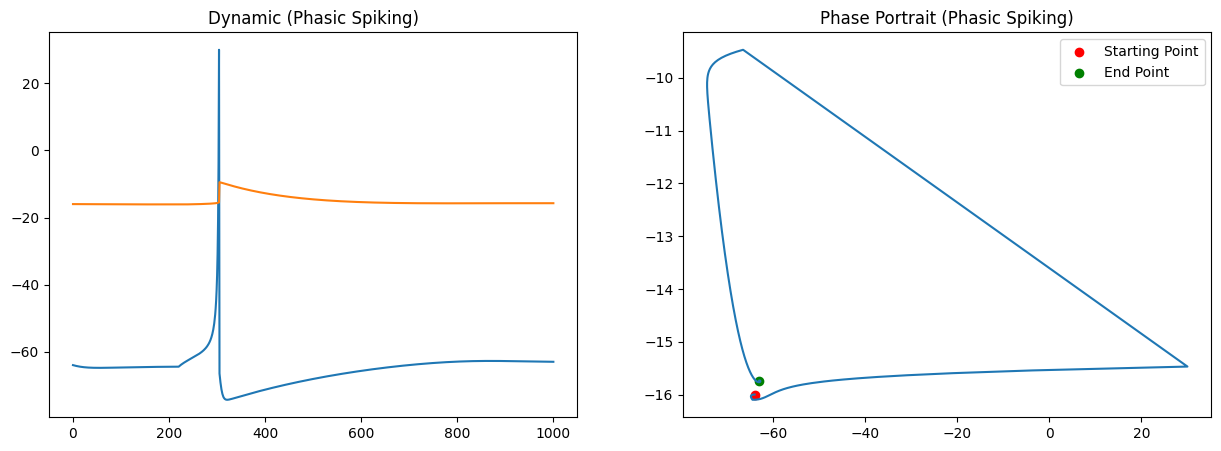

In [116]:
# (B) Phasic Spiking
u=-64
u, w = simulate_and_plot(u, "phasic_spiking")

### (C) Tonic Bursting

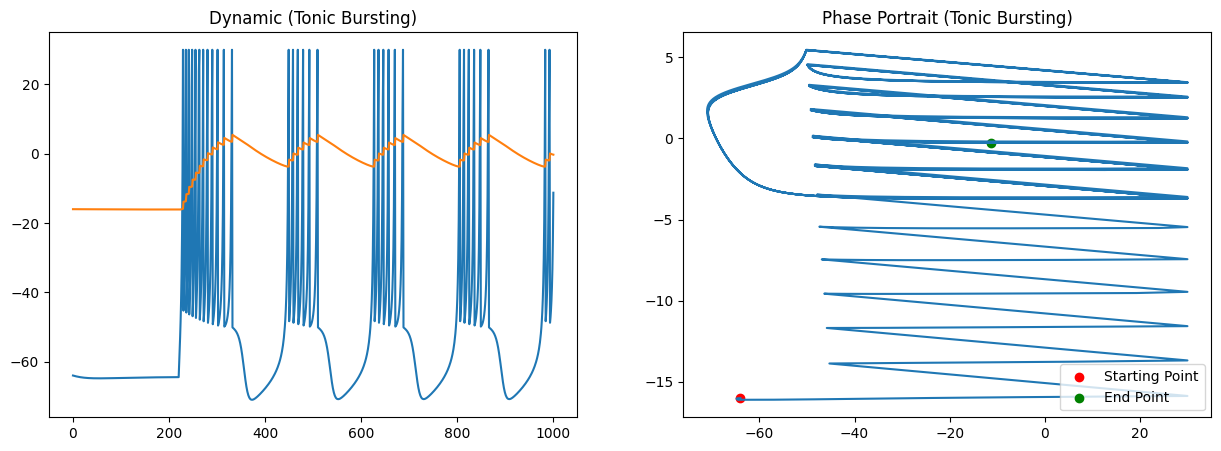

In [117]:
# (C) Tonic Bursting
u=-64
u, w = simulate_and_plot(u, "tonic_bursting")


### (D) Phasic Bursting

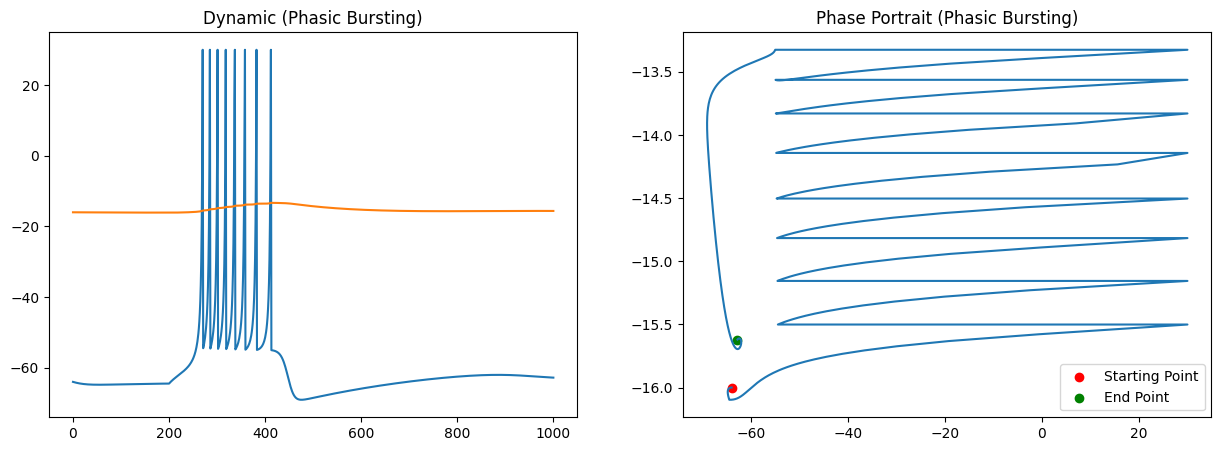

In [119]:
# (D) Phasic Bursting
u=-64
u, w = simulate_and_plot(u, "phasic_bursting")

### (E) Mixed Mode

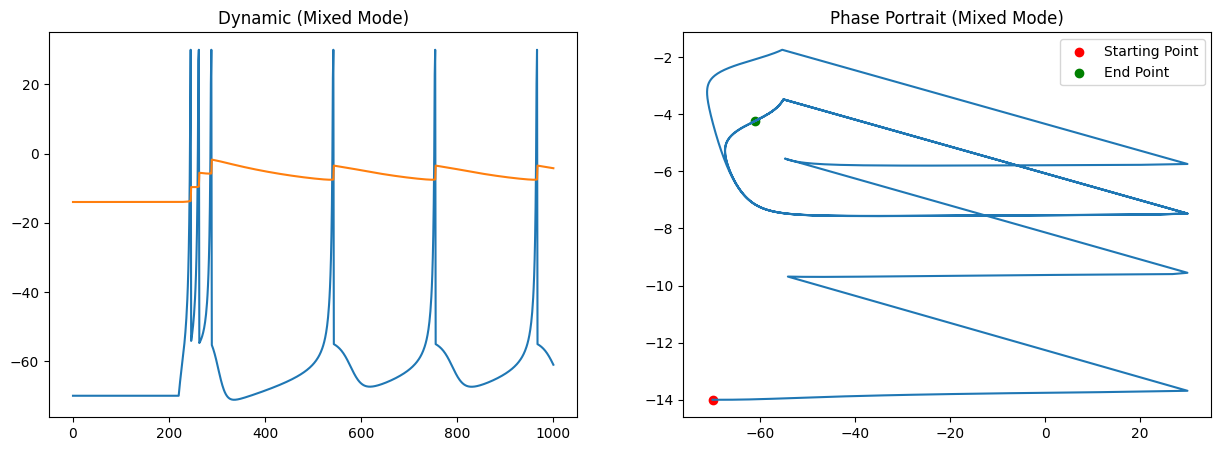

In [137]:
# (E) Mixed Mode
u=-70
u, w = simulate_and_plot(u, "mixed_mode", delta_t=0.15)


### (F) Spike Frequency Adaptation

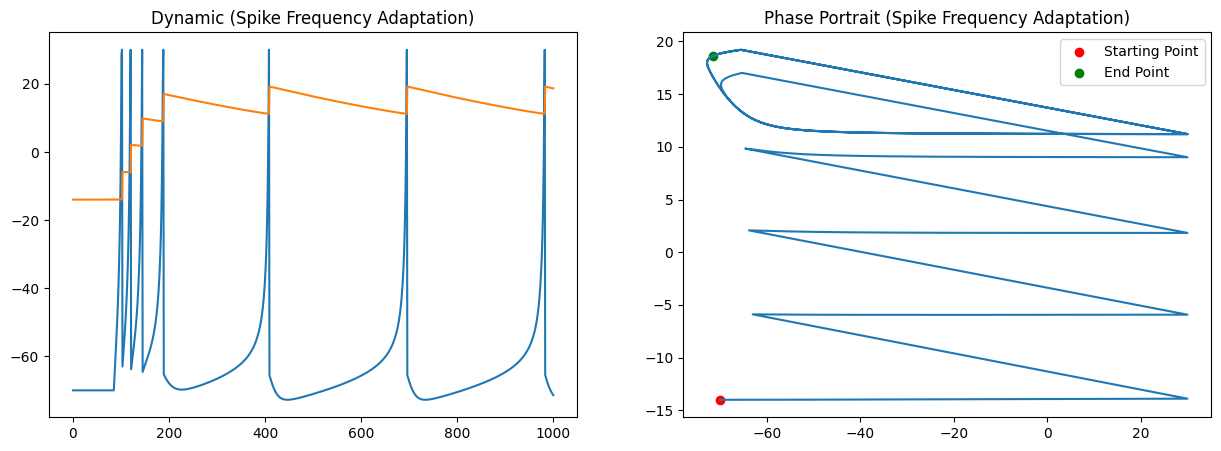

In [128]:
# (F) Spike Frequency Adaptation
u=-70
u, w = simulate_and_plot(u, "spike_frequency_adaptation", delta_t=0.1)

### (G) Class 1 Excitability

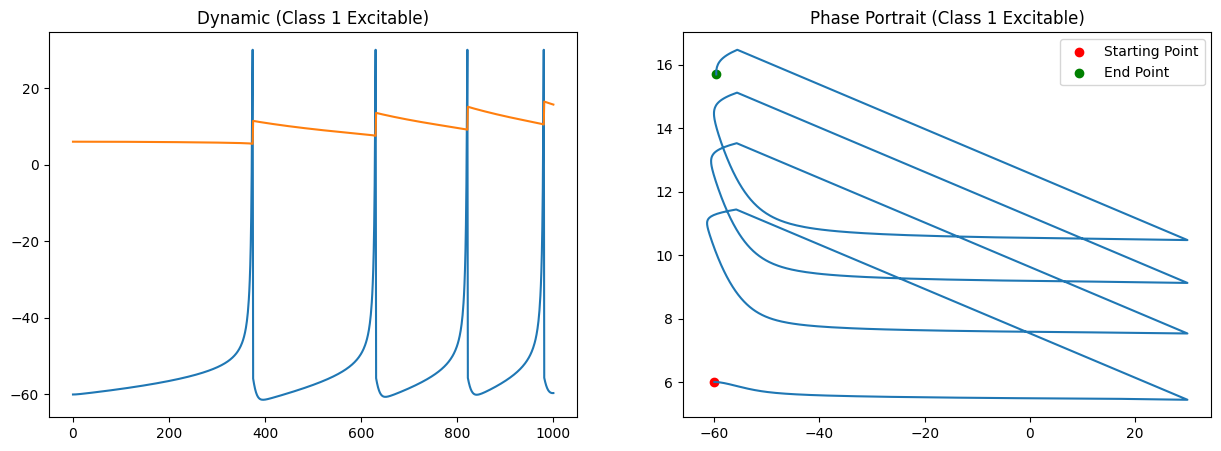

In [246]:
# (G) Class 1 Excitable
u=-60
I7 = np.zeros(1000)
I7 = 0.01* (np.arange(0, 1000))
param_dict["class_1_excitable"]["I"] = I7
u, w = simulate_and_plot(u, "class_1_excitable", delta_t=0.2)
 #TODO: fix the iziechevich_leapfrog function


### (H) Class 2 Excitability

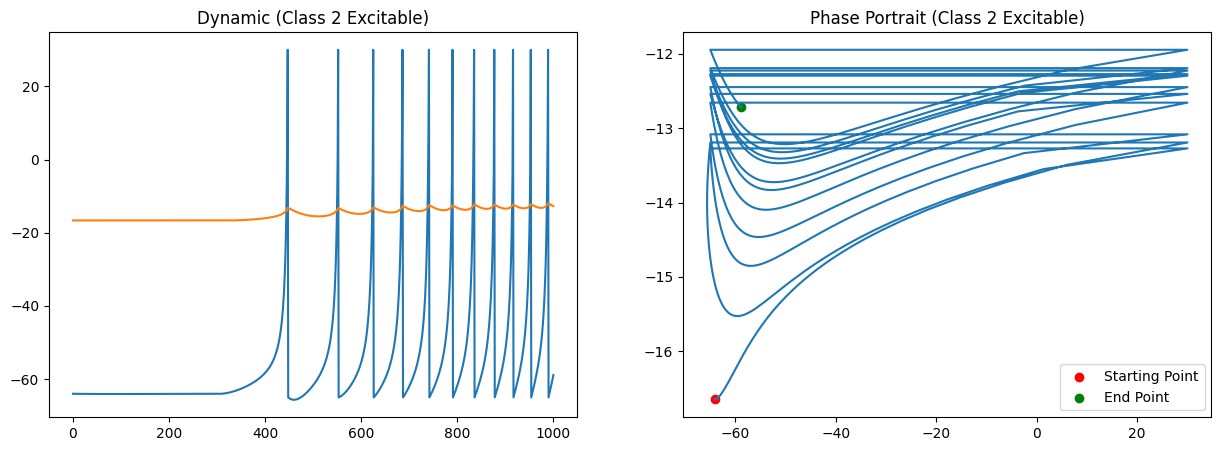

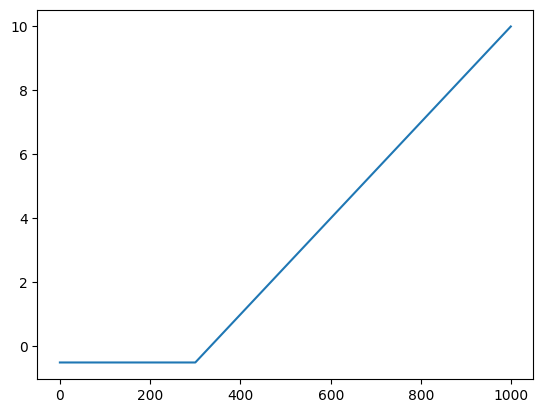

In [228]:
u=-64
u, w = simulate_and_plot(u, "class_2_excitable", delta_t=0.1, solver='euler')
plt.plot(param_dict["class_2_excitable"]["I"])


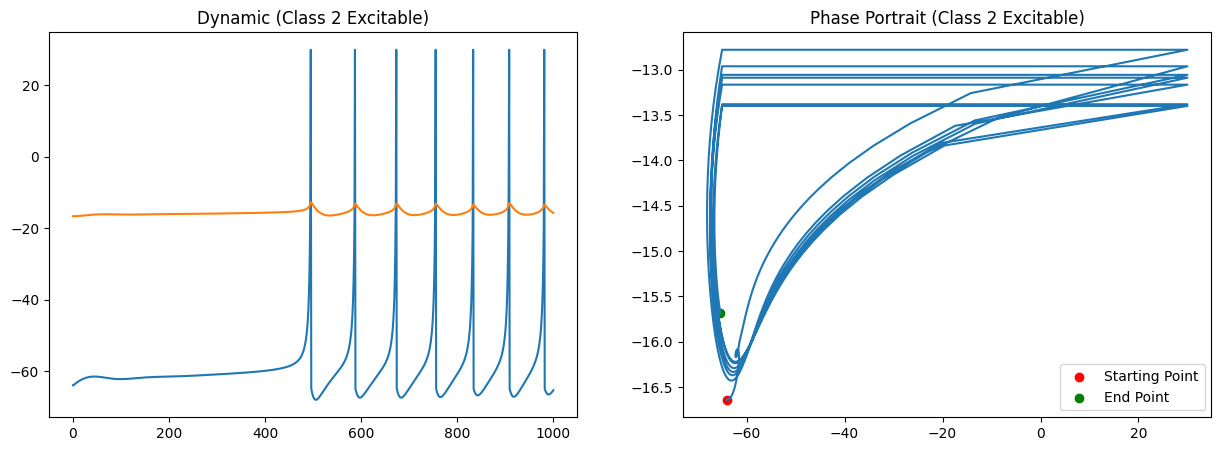

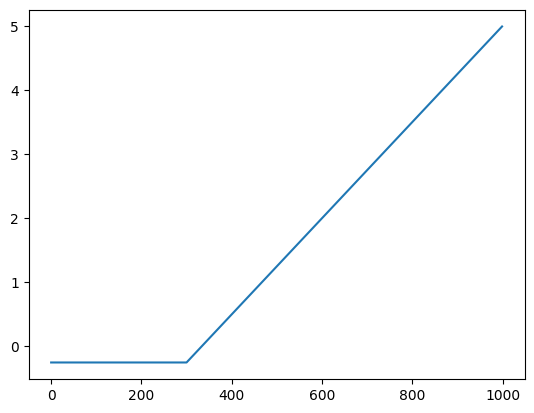

In [248]:
u=-64
param_dict["class_2_excitable"]["I"] = I7/10
u, w = simulate_and_plot(u, "class_2_excitable", delta_t=0.25, solver='euler')
param_dict["class_2_excitable"]["I"] = I8/2
plt.plot(param_dict["class_2_excitable"]["I"])

### (I) Spike Latency

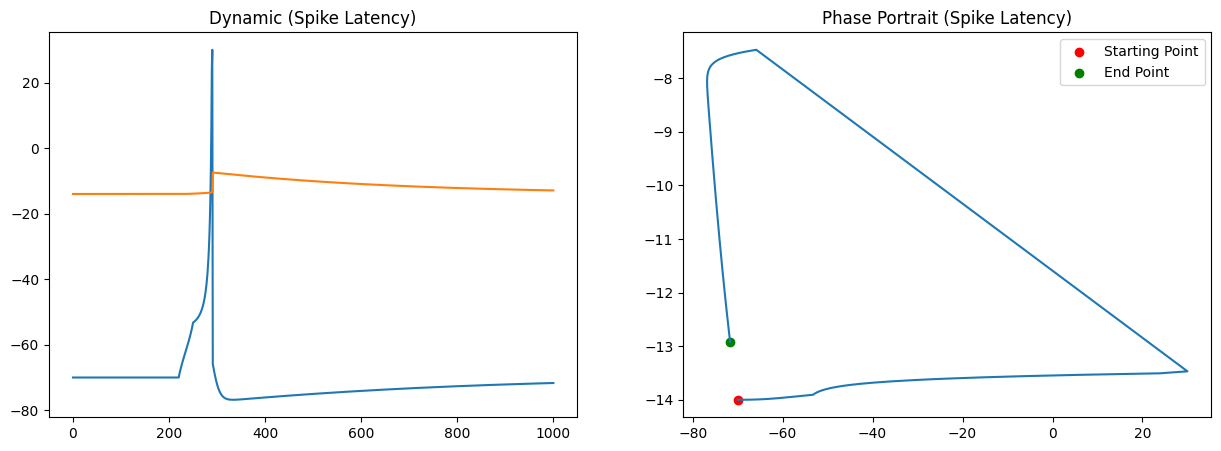

In [436]:
u= -70
param_dict["spike_latency"]["I"] = I9
simulate_and_plot(u, "spike_latency", delta_t=0.1);


### (J) Subthreshold Oscillations


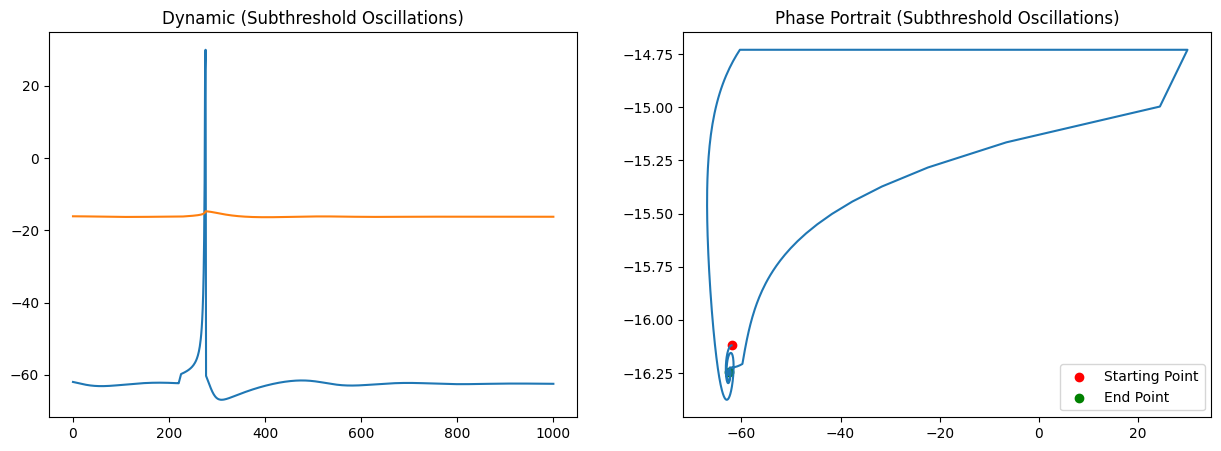

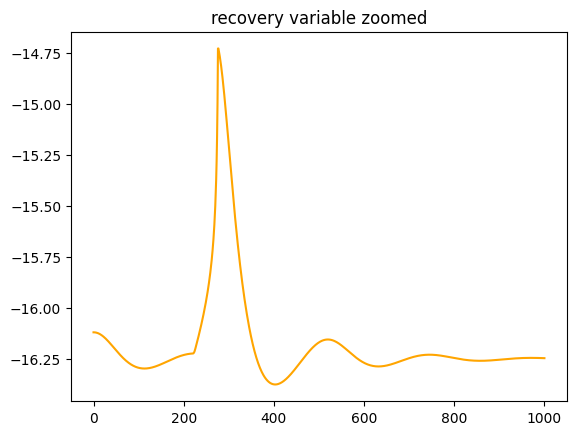

In [274]:
u = -62
uu, ww = simulate_and_plot(u, "subthreshold_oscillations", delta_t=0.25);
#zoomed plot of w
plt.plot(ww, c='orange')
plt.title('recovery variable zoomed')
plt.show()

### (K) Resonator

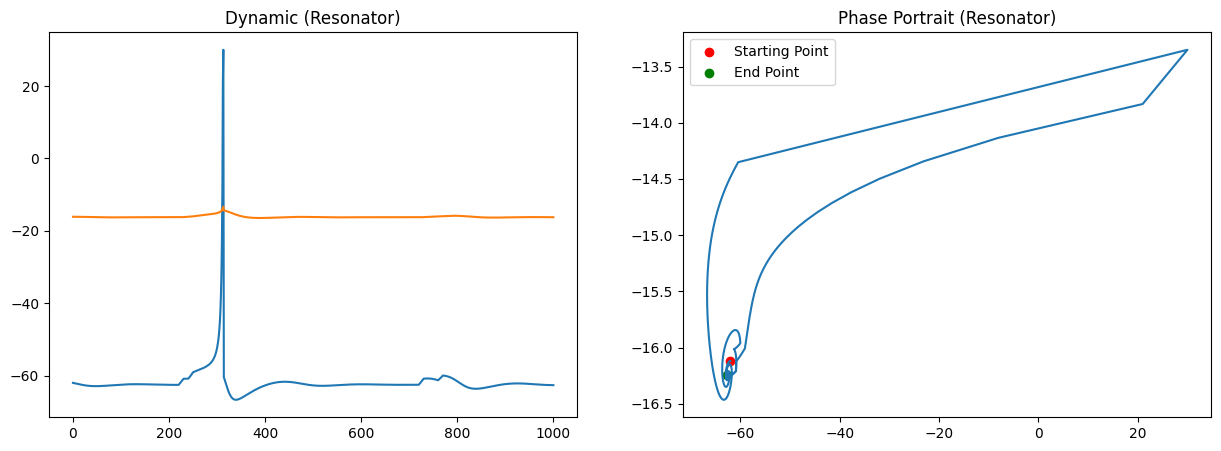

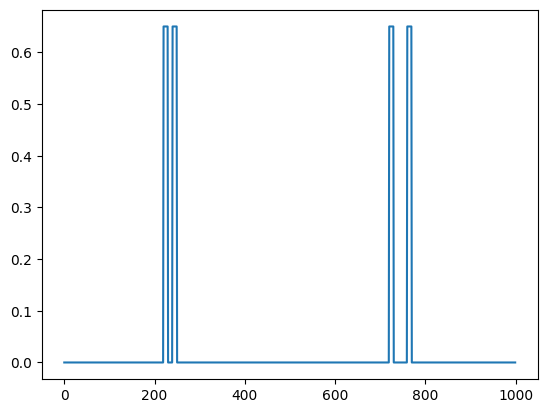

In [288]:
u = -62
I11 = np.zeros(1000)
I11[220:230] = 0.65
I11[240:250] = 0.65
I11[720:730] = 0.65
I11[760:770] = 0.65
param_dict["resonator"]["I"] = I11

u, w = simulate_and_plot(u, "resonator", delta_t=0.25)
plt.plot(param_dict["resonator"]["I"])


### (L) Integrator

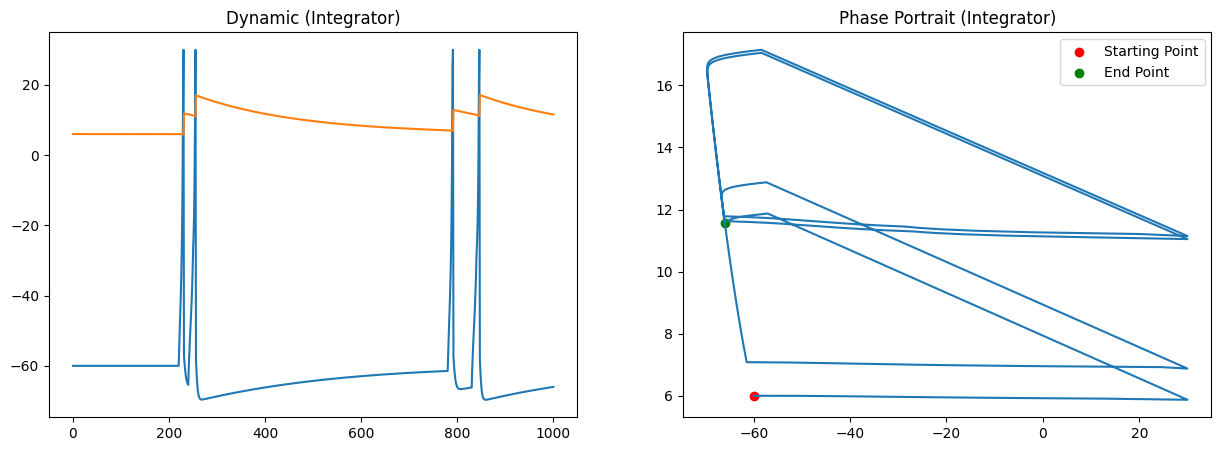

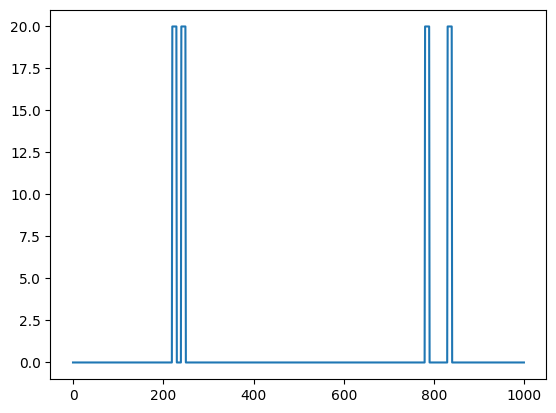

In [407]:
u = -60
uu, ww = simulate_and_plot(u, "integrator", delta_t=0.25, p_0 = 108, p_1 = 4.1, p_2 = 0.04);
plt.plot(param_dict["integrator"]["I"])

### (M) Rebound Spike

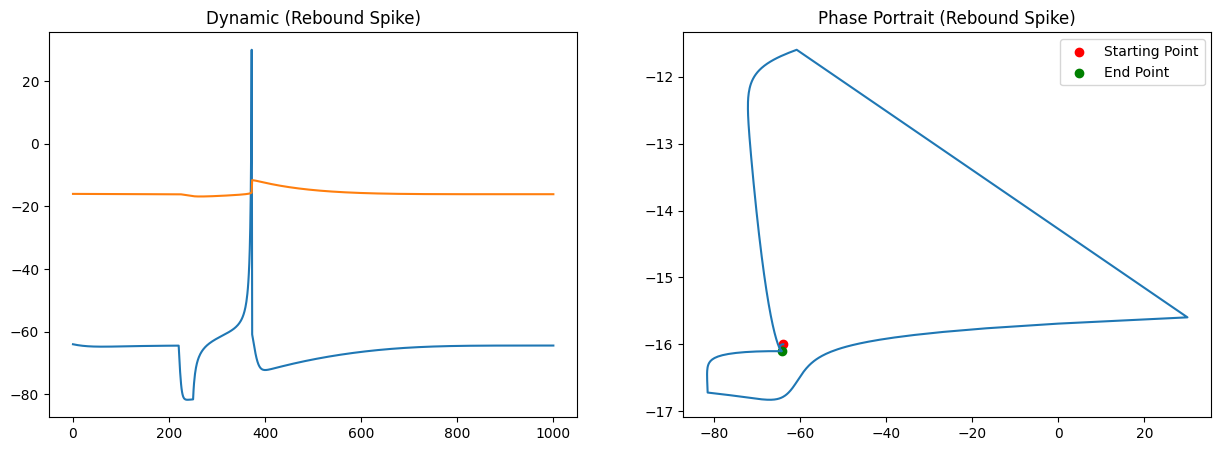

In [343]:
u = -64
I13 = np.zeros(1000)
I13[220:250] = -15
param_dict["rebound_spike"]["I"] = I13
uu, ww = simulate_and_plot(u, "rebound_spike", delta_t=0.2);

### (N) Rebound Burst

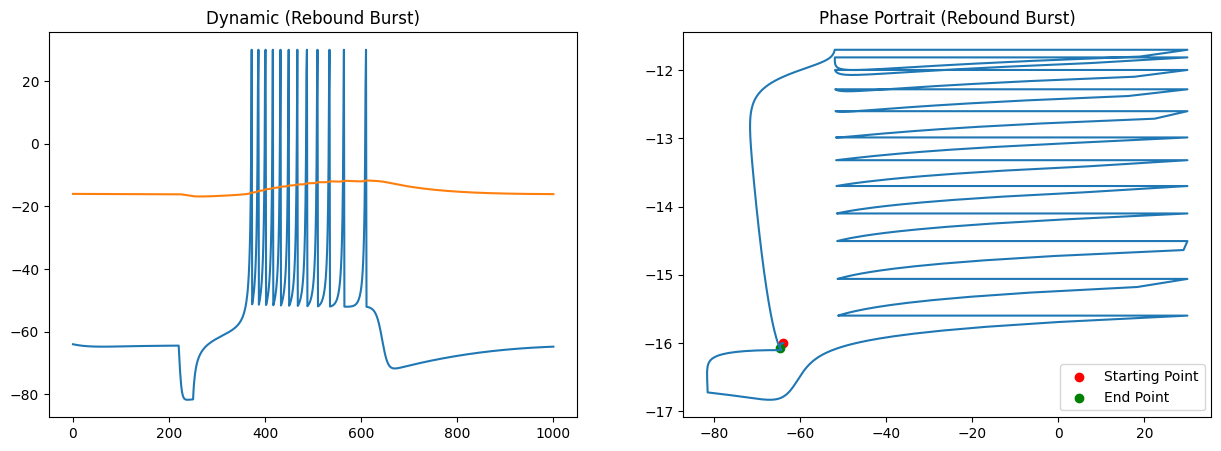

In [345]:
u = -64
param_dict["rebound_burst"]["I"] = I13 # same as rebound spike

simulate_and_plot(u, "rebound_burst", delta_t=0.2);

### (O) Threshold variability

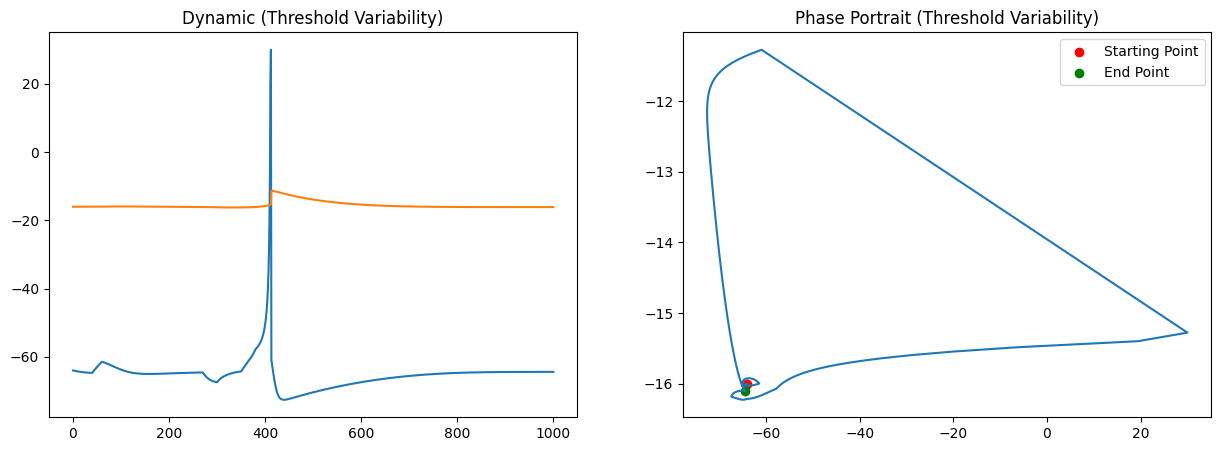

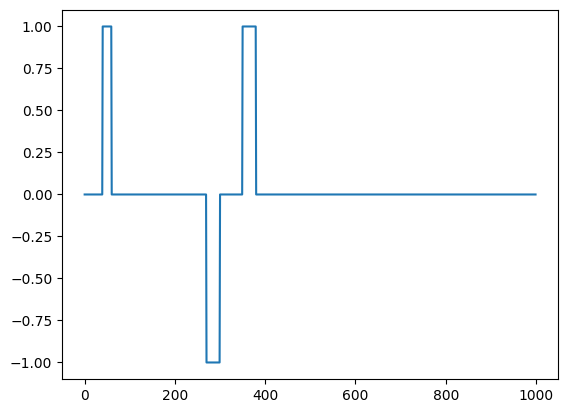

In [353]:
u = -64
I14 = np.zeros(1000)
I14[40:60] = 1
I14[270:300] = -1
I14[350:380] = 1
param_dict["threshold_variability"]["I"] = I14
simulate_and_plot(u, "threshold_variability", delta_t=0.2);
plt.plot(param_dict["threshold_variability"]["I"])

### (P) Bistability

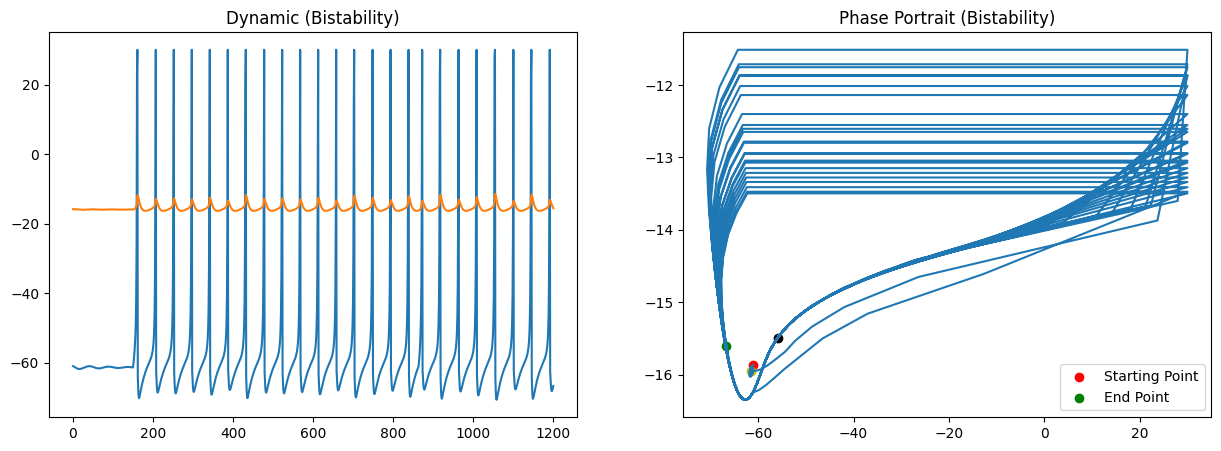

30.0
1202


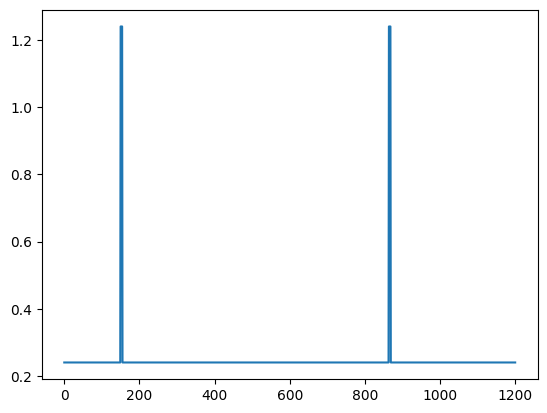

In [40]:
u = -61
I15 = np.zeros(1201) + 0.24
T1= len(I15)//8 
T2=216*4
I15[T1:T1+5]+=1
I15[T2:T2+5]+=1
param_dict["bistability"]["I"] = I15
uu, ww, ax = simulate_and_plot(u, "bistability", delta_t=1)
ax[1].scatter(uu[200], ww[200], c='k', label='First input')
ax[1].scatter(uu[T1], ww[T1], c='y')
plt.show()
print(np.max(uu))
print(len(uu))
plt.plot(param_dict["bistability"]["I"])



### (Q) Depolarizing after-potential

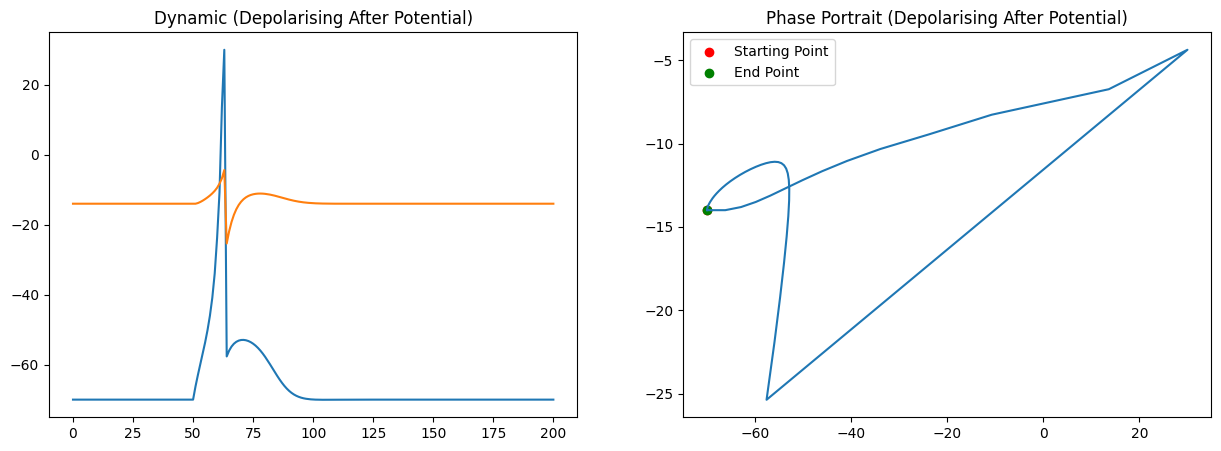

In [504]:
u = -70
I16=np.zeros(200)
I16[50:60]=15
param_dict['depolarising_after_potential']['I']=I16
simulate_and_plot(u, 'depolarising_after_potential');

### (R) Accomodation

### (S) Inhibition-induced spiking

([-63.8,
  -63.782399999999996,
  -63.76697000959999,
  -63.75378112919893,
  -63.742866854421706,
  -63.73422449484106,
  -63.727816889152365,
  -63.723574473264904,
  -63.72139773991151,
  -63.72116010678869,
  -63.72271118612488,
  -63.72588042339994,
  -63.73048104835618,
  -63.73631425917887,
  -63.74317354243931,
  -63.75084901850727,
  -63.75913169567258,
  -63.76781751668352,
  -63.77671108874017,
  -63.78562900152755,
  -63.794402656485175,
  -63.80288055265402,
  -63.810929998388104,
  -63.81843824220911,
  -63.825313038517095,
  -63.83148268343791,
  -63.83689557185917,
  -63.84151933817023,
  -63.84533965027501,
  -63.848358729327515,
  -63.85059366686011,
  -63.85207460721614,
  -63.8528428572167,
  -63.85294897755402,
  -63.852450902202364,
  -63.85141212376816,
  -63.84989997462823,
  -63.84798402626619,
  -63.8457346226221,
  -63.84322155762251,
  -63.84051290237662,
  -63.83767398375751,
  -63.83476651314864,
  -63.83184786190202,
  -63.82897047840292,
  -63.8261814404

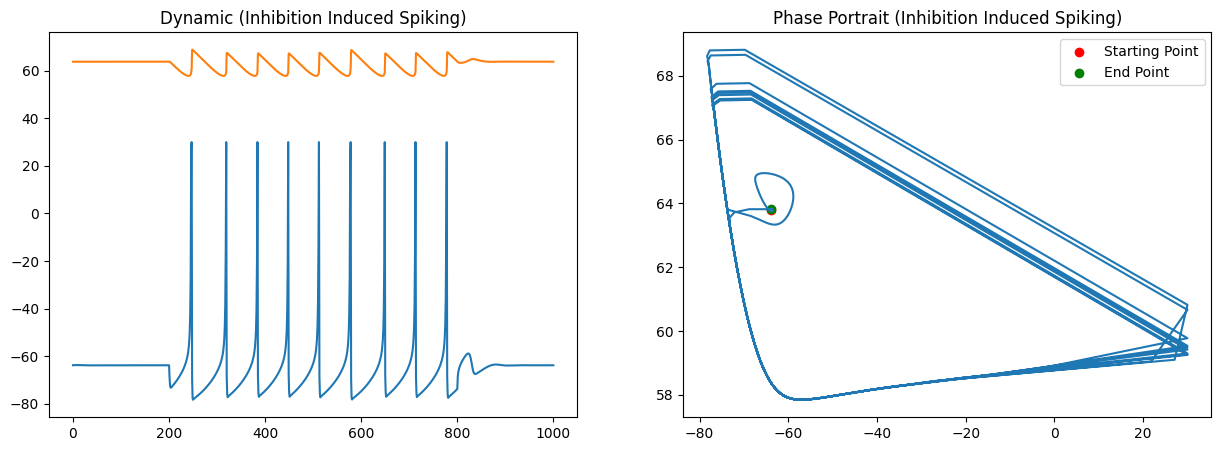

In [30]:
u =-63.8
simulate_and_plot(u, key='inhibition_induced_spiking', delta_t=1)

### (T) Inhibition-induced bursting

([-63.8,
  -63.799119999999995,
  -63.798244631651194,
  -63.797373924777276,
  -63.79650790886687,
  -63.795646613073245,
  -63.79479006621398,
  -63.79393829677067,
  -63.79309133288865,
  -63.79224920237668,
  -63.7914119327067,
  -63.790579551013536,
  -63.78975208409467,
  -63.78892955840998,
  -63.78811200008151,
  -63.78729943489324,
  -63.78649188829088,
  -63.785689385381644,
  -63.784891950934075,
  -63.78409960937783,
  -63.78331238480355,
  -63.782530300962634,
  -63.78175338126713,
  -63.780981648789556,
  -63.7802151262628,
  -63.779453836079966,
  -63.778697800294246,
  -63.77794704061886,
  -63.777201578426926,
  -63.77646143475138,
  -63.77572663028493,
  -63.774997185379945,
  -63.77427312004845,
  -63.773554453962056,
  -63.77284120645195,
  -63.77213339650885,
  -63.77143104278302,
  -63.77073416358428,
  -63.77004277688198,
  -63.76935690030506,
  -63.7686765511421,
  -63.76800174634131,
  -63.767332502510655,
  -63.76666883591788,
  -63.766010762490616,
  -63.7653

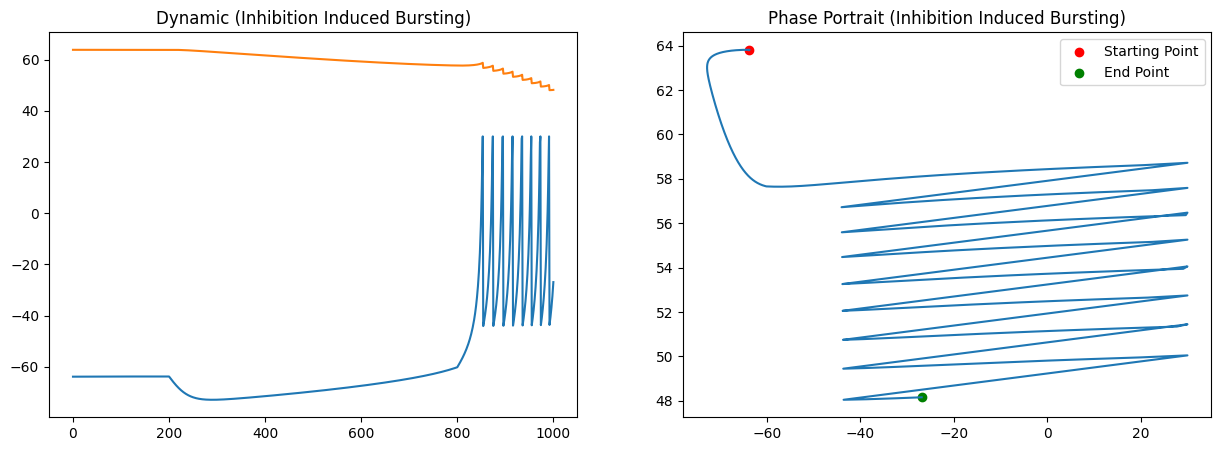

In [38]:
u = -63.8
param_dict['inhibition_induced_bursting']['I'] = param_dict['inhibition_induced_spiking']['I']
#plt.plot(param_dict['inhibition_induced_bursting']['I'] )
simulate_and_plot(u, key='inhibition_induced_bursting', delta_t=0.05)

In [406]:
# general-purpose solver with Euler method

def euler_solver(variables, F, delta_t, steps=1000, reset_function=None ):
    var_dynamics= np.zeros((len(variables),  steps))
    
    for t in range(steps):
        var_new= np.zeros_like(variables)
        for i, x in enumerate(variables):
            
            var_new[i] = x + delta_t * F[i](*variables)
            
            if reset_function is not None:
                var_new = reset_function(*var_new)
            variables=var_new
            var_dynamics[:,  t] =var_new
    return var_dynamics
    

In [407]:
def leapfrog_solver(variables, F, delta_t, steps=1000, reset_function=None, **kwargs):
    var_dynamics= np.zeros((len(variables),  steps))
    
    for t in range(steps):
        for i, x in enumerate(variables):
           # apply the update rule with the necessary arguments
            variables[i] = x + delta_t * F[i](*variables, **kwargs[i])
           
            if reset_function is not None:
                variables = reset_function(*variables)
            var_dynamics[:,  t] =variables
    return var_dynamics

In [1]:
def f1(x,y):
    return x+y
def f2(x,y, c=1):
    return c*(x+y)

def apply_f(inputs, functions, **kwargs):
    return [f(*inputs, **kwargs) for f in functions]

variables = [1, 2]  
F = [f1, f2]
apply_f(variables, F, c=2)

TypeError: f1() got an unexpected keyword argument 'c'